# Visualisation des données

In [129]:
import os

import pandas as pd

In [130]:
# Répertoire du fichier de données
PROCESSED_DIR = '/Users/EnzoButhiot/Documents/AMSE/MAG3/S2/Projet_mignot/corona/data/processed/'

# Table principale
ALL_DATA_FILE = 'all_data.csv'

In [131]:
epidemie_df = (pd.read_csv(os.path.join(PROCESSED_DIR, ALL_DATA_FILE), parse_dates=['Last Update'])
               .assign(day=lambda _df: _df['Last Update'].dt.date))

In [132]:
epidemie_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
0,Liaoning,Mainland China,2020-01-22 17:00:00,2.0,NaN,NaN,41.2956,122.6085,01-22-2020.csv,2020-01-22
1,Ningxia,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,37.2692,106.1655,01-22-2020.csv,2020-01-22
2,Qinghai,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN,35.7452,95.9956,01-22-2020.csv,2020-01-22
3,Shaanxi,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN,35.1917,108.8701,01-22-2020.csv,2020-01-22
4,Shandong,Mainland China,2020-01-22 17:00:00,2.0,NaN,NaN,36.3427,118.1498,01-22-2020.csv,2020-01-22


In [108]:
epidemie_df.dtypes

Province/State            object
Country/Region            object
Last Update       datetime64[ns]
Confirmed                float64
Deaths                   float64
Recovered                float64
Latitude                 float64
Longitude                float64
source                    object
day                       object
dtype: object

In [109]:
epidemie_df['Country/Region'].value_counts()

US                     1560
Mainland China         1517
China                   363
Australia               314
Canada                  242
                       ... 
Taipei and environs       1
Ivory Coast               1
Uganda                    1
Viet Nam                  1
Russian Federation        1
Name: Country/Region, Length: 210, dtype: int64

## Epidémie en France

In [68]:
! pip install seaborn

In [110]:
import seaborn as sns

sns.set()

In [111]:
import matplotlib.pyplot as plt

In [112]:
%matplotlib inline

In [113]:

epidemie_df[(epidemie_df['Country/Region'] == 'France') & (epidemie_df['Province/State'] == 'France')] \
.sort_values('day', ascending=False).head()





,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
6438,France,France,2020-03-21 20:43:02,14282.0,562.0,12.0,46.2276,2.2137,03-21-2020.csv,2020-03-21
6139,France,France,2020-03-20 22:43:03,12612.0,450.0,12.0,46.2276,2.2137,03-20-2020.csv,2020-03-20
4313,France,France,2020-03-19 20:43:02,10871.0,243.0,12.0,46.2276,2.2137,03-19-2020.csv,2020-03-19
4605,France,France,2020-03-18 18:33:02,9043.0,148.0,12.0,46.2276,2.2137,03-18-2020.csv,2020-03-18
2181,France,France,2020-03-17 19:13:08,7652.0,148.0,12.0,46.2276,2.2137,03-17-2020.csv,2020-03-17


In [114]:
france_df.head(), france_df.tail()


(    Province/State Country/Region         Last Update  Confirmed  Deaths  \
 43             NaN         France 2020-02-26 20:03:06       18.0     2.0   
 141            NaN         France 2020-02-27 22:13:10       38.0     2.0   
 246            NaN         France 2020-02-15 20:53:02       12.0     1.0   
 321            NaN         France 2020-02-15 20:53:02       12.0     1.0   
 361            NaN         France 2020-03-10 18:53:02     1784.0    33.0   
 
      Recovered  Latitude  Longitude          source         day  
 43        11.0      47.0        2.0  02-26-2020.csv  2020-02-26  
 141       11.0      47.0        2.0  02-27-2020.csv  2020-02-27  
 246        4.0      47.0        2.0  02-18-2020.csv  2020-02-15  
 321        4.0      47.0        2.0  02-19-2020.csv  2020-02-15  
 361       12.0      47.0        2.0  03-10-2020.csv  2020-03-10  ,
      Province/State Country/Region         Last Update  Confirmed  Deaths  \
 6760            NaN         France 2020-03-03 15:23:03

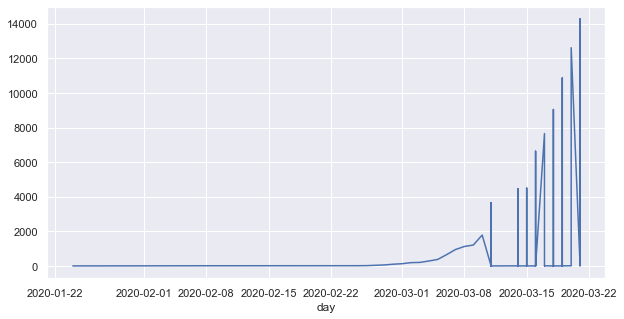

In [74]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].set_index('day')['Confirmed'].plot(figsize=(10, 5));

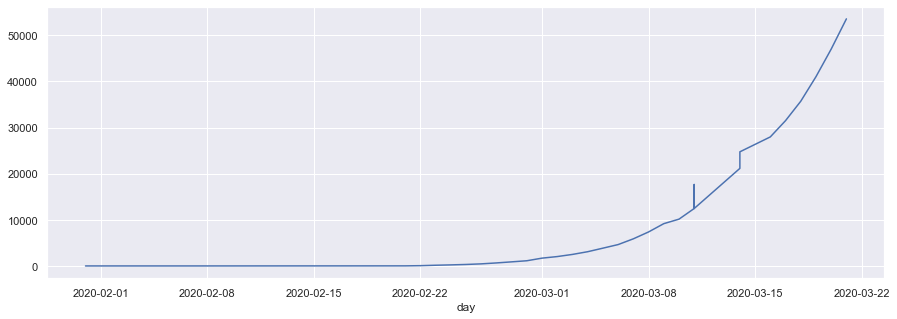

In [75]:
epidemie_df[epidemie_df['Country/Region'] == 'Italy'].set_index('day')['Confirmed'].plot(figsize=(15, 5));

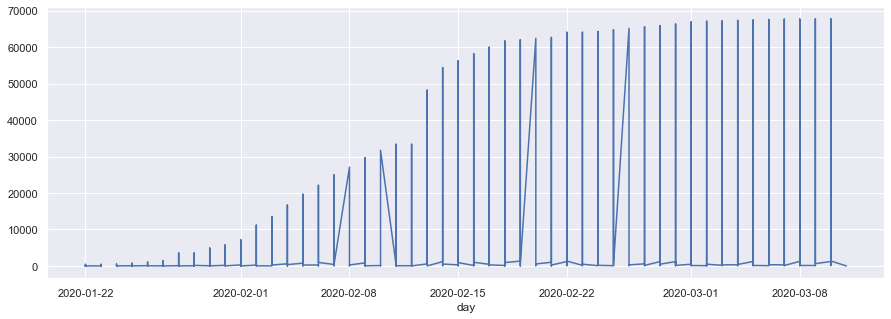

In [76]:
epidemie_df[epidemie_df['Country/Region'] == 'Mainland China'].set_index('day')['Confirmed'].plot(figsize=(15, 5));

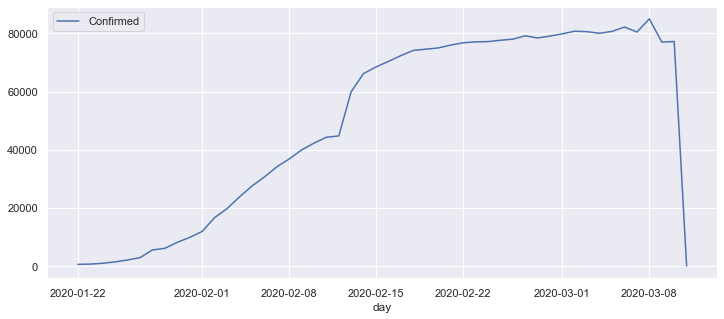

In [77]:
(epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
 .groupby('day')
 .agg({'Confirmed': 'sum'})
).plot(figsize=(12, 5));

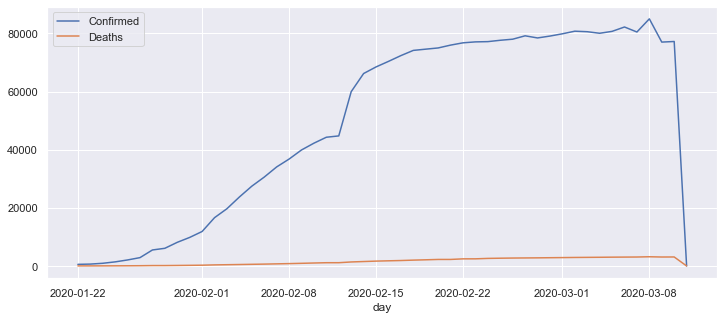

In [78]:
(epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
 .fillna(value=0)
 .groupby('day')
 .agg({'Confirmed': 'sum', 'Deaths': 'sum'})
).plot(figsize=(12, 5));

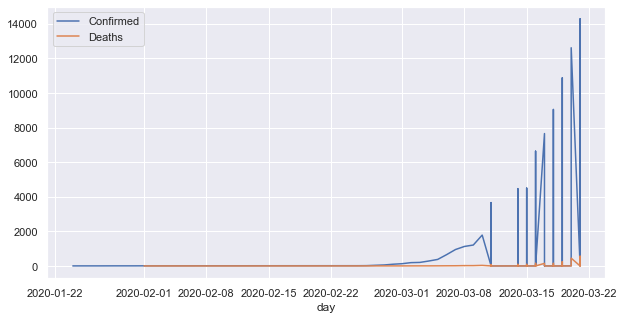

In [79]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].set_index('day')[ ['Confirmed', 'Deaths'] ].plot(figsize=(10, 5));

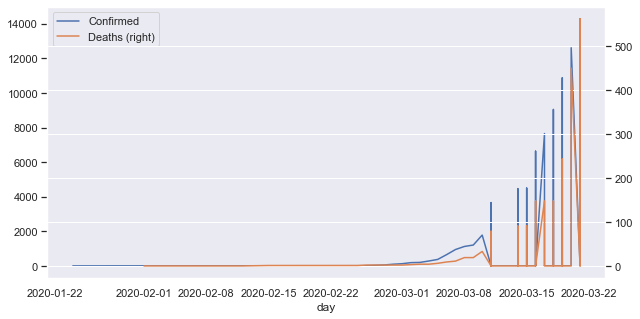

In [80]:
(epidemie_df[epidemie_df['Country/Region'] == 'France']
 .set_index('day')[ ['Confirmed', 'Deaths'] ]
 .plot(secondary_y=['Deaths'], figsize=(10, 5))
);

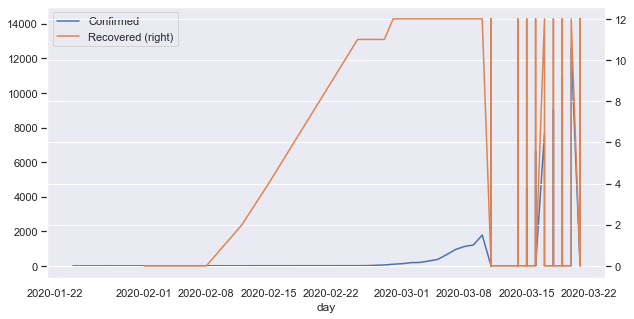

In [81]:
(epidemie_df[epidemie_df['Country/Region'] == 'France']
 .set_index('day')[ ['Confirmed', 'Recovered'] ]
 .plot(secondary_y=['Recovered'], figsize=(10, 5))
);

In [82]:
china_df = (epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
            .groupby('day')
            .agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
           )

In [83]:
china_df.head()

,Confirmed,Deaths,Recovered
day,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0


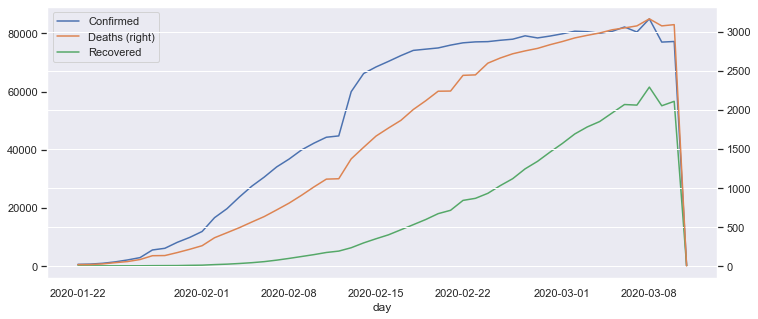

In [84]:
china_df.plot(secondary_y=['Deaths'], figsize=(12, 5));

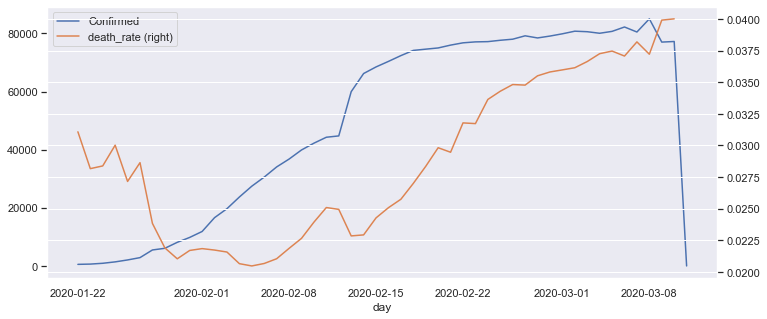

In [85]:
(china_df
 .assign(death_rate=lambda _df: _df['Deaths'] / _df['Confirmed'])
 [['Confirmed', 'death_rate']]
 .plot(secondary_y=['death_rate'], figsize=(12, 5))
);

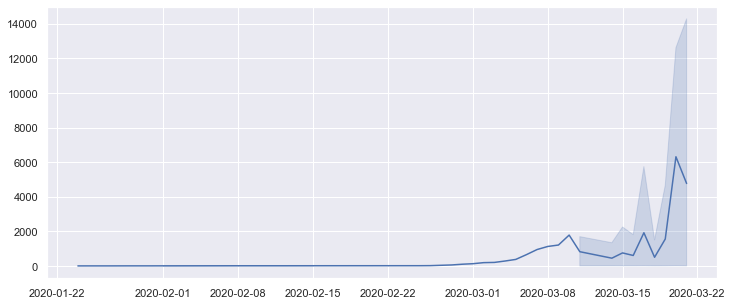

In [86]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=epidemie_df[epidemie_df['Country/Region'] == 'France'].set_index('day')['Confirmed']);

In [87]:
epidemie_df.groupby(['Country/Region', 'day']).agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

Confirmed  Deaths  Recovered
Country/Region                 day                                     
 Azerbaijan                    2020-02-28        1.0     0.0        0.0
Afghanistan                    2020-02-24       13.0     0.0        0.0
                               2020-03-08        8.0     0.0        0.0
                               2020-03-10        5.0     0.0        0.0
                               2020-03-11       21.0     0.0        0.0
...                                              ...     ...        ...
Zambia                         2020-03-19        6.0     0.0        0.0
Zimbabwe                       2020-03-20        1.0     0.0        0.0
                               2020-03-21        3.0     0.0        0.0
occupied Palestinian territory 2020-03-10       25.0     0.0        0.0
                               2020-03-11        0.0     0.0        0.0

[2313 rows x 3 columns]

In [88]:
EUROPE = ['France', 'Germany', 'UK', 'Spain']

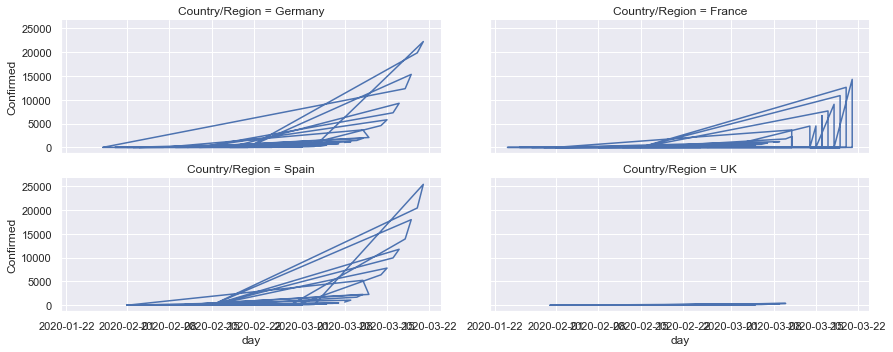

In [89]:
import matplotlib.pyplot as plt

g = sns.FacetGrid(epidemie_df[epidemie_df['Country/Region'].isin(EUROPE)],
                  col="Country/Region", col_wrap=2, height=2.5, aspect=2.5)
g = g.map(plt.plot, "day", "Confirmed");

In [90]:
import plotly.offline as py
import plotly.graph_objs as go

In [91]:
france_df = epidemie_df[epidemie_df['Country/Region'] == 'France']

In [92]:
data = [go.Scatter(x=france_df['day'],
                   y=france_df['Confirmed'],
                   name='Cas confirmés en France'
                  )]
py.iplot(data)

In [93]:
data = [go.Scatter(x=france_df['day'],
                   y=france_df['Confirmed'],
                   name='Confirmés/France'
                  ),
        go.Scatter(x=epidemie_df[epidemie_df['Country/Region'] == 'Germany']['day'],
                   y=epidemie_df[epidemie_df['Country/Region'] == 'Germany']['Confirmed'],
                   name='Confirmés/Allemagne'
                  )
       ]

layout = dict(
    title = "Epidémie Corona Virus",
    xaxis = dict(range = ['2020-01-22', '2020-03-05'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [94]:
import yaml

ENV_FILE = "/Users/EnzoButhiot/Documents/corona/env.yaml"
with open(ENV_FILE) as f: 
    params=yaml.load(f, Loader=yaml.FullLoader)

In [95]:
params

{'directories': {'processed': '/Users/EnzoButhiot/Documents/AMSE/MAG3/S2/Projet_mignot/corona/data/processed/',
  'raw': '/Users/EnzoButhiot/Documents/AMSE/MAG3/S2/Projet_mignot/corona/data/raw'},
 'files': {'all_data': 'all_data.csv'}}

In [96]:
os.path.abspath(ENV_FILE)

'/Users/EnzoButhiot/Documents/corona/env.yaml'

In [97]:
os.path.dirname(os.path.abspath(ENV_FILE))

'/Users/EnzoButhiot/Documents/corona'

In [98]:
import datetime

epidemie_df[epidemie_df['Country/Region'] == 'Mainland China'][lambda df: df.day <= datetime.date(2020, 3, 26)] \
.sort_values('day').tail(20)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
369,Jiangxi,Mainland China,2020-03-10 01:33:02,935.0,1.0,927.0,27.6140,115.7221,03-10-2020.csv,2020-03-10
370,Shandong,Mainland China,2020-03-10 07:33:03,758.0,6.0,719.0,36.3427,118.1498,03-10-2020.csv,2020-03-10
372,Jiangsu,Mainland China,2020-03-10 08:13:08,631.0,0.0,627.0,32.9711,119.4550,03-10-2020.csv,2020-03-10
374,Chongqing,Mainland China,2020-03-10 23:53:02,576.0,6.0,547.0,30.0572,107.8740,03-10-2020.csv,2020-03-10
377,Heilongjiang,Mainland China,2020-03-10 00:13:18,481.0,13.0,434.0,47.8620,127.7615,03-10-2020.csv,2020-03-10
401,Gansu,Mainland China,2020-03-10 14:33:13,125.0,2.0,88.0,36.0611,103.8343,03-10-2020.csv,2020-03-10
383,Shanghai,Mainland China,2020-03-10 06:13:14,344.0,3.0,319.0,31.2020,121.4491,03-10-2020.csv,2020-03-10
389,Guangxi,Mainland China,2020-03-10 00:53:02,252.0,2.0,234.0,23.8298,108.7881,03-10-2020.csv,2020-03-10
390,Shaanxi,Mainland China,2020-03-10 08:53:02,245.0,1.0,227.0,35.1917,108.8701,03-10-2020.csv,2020-03-10
396,Guizhou,Mainland China,2020-03-10 01:13:07,146.0,2.0,129.0,26.8154,106.8748,03-10-2020.csv,2020-03-10


In [99]:
epidemie_df['day'].min()

datetime.date(2020, 1, 22)

In [100]:
epidemie_df['day'].max()

datetime.date(2020, 3, 21)

In [128]:
epidemie_df['day'].unique()

array([datetime.date(2020, 1, 22), datetime.date(2020, 1, 23),
       datetime.date(2020, 1, 24), datetime.date(2020, 1, 25),
       datetime.date(2020, 1, 26), datetime.date(2020, 1, 27),
       datetime.date(2020, 1, 28), datetime.date(2020, 1, 29),
       datetime.date(2020, 1, 30), datetime.date(2020, 1, 31),
       datetime.date(2020, 2, 1), datetime.date(2020, 2, 2),
       datetime.date(2020, 2, 3), datetime.date(2020, 2, 4),
       datetime.date(2020, 2, 5), datetime.date(2020, 2, 6),
       datetime.date(2020, 2, 7), datetime.date(2020, 2, 8),
       datetime.date(2020, 2, 9), datetime.date(2020, 2, 10),
       datetime.date(2020, 2, 11), datetime.date(2020, 2, 12),
       datetime.date(2020, 2, 13), datetime.date(2020, 2, 14),
       datetime.date(2020, 2, 15), datetime.date(2020, 2, 16),
       datetime.date(2020, 2, 17), datetime.date(2020, 2, 18),
       datetime.date(2020, 2, 19), datetime.date(2020, 2, 20),
       datetime.date(2020, 2, 21), datetime.date(2020, 2, 22),
 

In [102]:
str(epidemie_df['day'].min())

'2020-01-22'

In [103]:
(epidemie_df['day'].max() - epidemie_df['day'].min()).days

59

In [104]:
{i:str(date) for i, date in enumerate(epidemie_df['day'].unique())}

{0: '2020-02-26',
 1: '2020-02-25',
 2: '2020-02-24',
 3: '2020-02-21',
 4: '2020-02-22',
 5: '2020-02-13',
 6: '2020-02-16',
 7: '2020-02-12',
 8: '2020-02-17',
 9: '2020-02-09',
 10: '2020-02-03',
 11: '2020-02-08',
 12: '2020-02-01',
 13: '2020-02-05',
 14: '2020-02-27',
 15: '2020-02-18',
 16: '2020-02-15',
 17: '2020-02-07',
 18: '2020-02-04',
 19: '2020-02-14',
 20: '2020-02-19',
 21: '2020-03-10',
 22: '2020-03-08',
 23: '2020-03-06',
 24: '2020-03-07',
 25: '2020-03-09',
 26: '2020-03-02',
 27: '2020-03-01',
 28: '2020-03-03',
 29: '2020-03-04',
 30: '2020-02-28',
 31: '2020-02-29',
 32: '2020-03-11',
 33: '2020-02-11',
 34: '2020-02-06',
 35: '2020-02-02',
 36: '2020-03-05',
 37: '2020-01-31',
 38: '2020-01-30',
 39: '2020-02-20',
 40: '2020-03-17',
 41: '2020-03-14',
 42: '2020-03-12',
 43: '2020-03-13',
 44: '2020-03-15',
 45: '2020-03-16',
 46: '2020-01-26',
 47: '2020-01-27',
 48: '2020-01-22',
 49: '2020-01-23',
 50: '2020-02-10',
 51: '2020-02-23',
 52: '2020-03-19',
 53

In [58]:
epidemie_df.apply(lambda r: r['Country/Region'] + ' (' + str(r['Confirmed']) + ')', axis=1)

0       Mainland China (65187.0)
1        Mainland China (1347.0)
2        Mainland China (1271.0)
3           South Korea (1261.0)
4        Mainland China (1205.0)
                  ...           
7612             Australia (0.0)
7613                    US (0.0)
7614                    US (0.0)
7615                    US (0.0)
7616                    US (0.0)
Length: 7617, dtype: object